<a href="https://colab.research.google.com/github/kytk/AI-MAILs/blob/main/python_6_scikit-learn-1.ipynb?hl=ja" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 医療従事者のためのPython: 機械学習 (1)

根本清貴 (筑波大学医学医療系精神医学)

Ver.20240811

### 目次
1. 機械学習とは
2. 機械学習のステップ
3. Pythonでの機械学習
4. 乳がんデータセット
5. 教師あり学習の実際
6. 異なるモデルの選択

### 1. 機械学習とは
- 機械学習の定義
    - 「データからルールやパターンを導き出し、予測や意思決定を行う技術」
    - (従来: 人間がルールを決める)
- 機械学習の種類
    - 教師あり学習
        - 入力データとその対応する正解(ラベル)がペアになったデータセットを用いてモデルを訓練
        - 新しいデータが入ってきた時にそのモデルから正しいラベルを予測
        - 例: 画像の分類(犬と猫の画像を分類)、スパムメールの分類、価格予測
    - 教師なし学習
        - ラベルのないデータを用いてモデルを訓練
        - データの内部構造やパターンを見つけ出す
        - 例: クラスタリング(似たデータをグループに分ける)、次元削減(データの特徴を少数の重要な特徴に圧縮する)
    - 強化学習
        - エージェント(学習者)が環境と相互作用しながら学習する。エージェントは行動を選択し、その結果として得られる報酬を基に次の行動を改善する
        - 長期的な累積報酬を最大化することが目標
        - 例: ゲーム、ロボット制御、自動運転

- 本日は教師あり学習 (supervised learning) について学ぶ


### 2. 機械学習のステップ

1. データの収集 (Data Collection):
    - 必要なデータを収集する
    - 例：センサーデータ、ユーザー行動データ、画像データなど

2. データの確認とクレンジング (Data Inspection and Cleaning):
    - データの品質を確認し、不足している値やノイズを処理する
    - 例：欠損値の補完、異常値の除去など

3. **データの分割 (Data Splitting)**:
    - データセットを訓練データ、検証データ、テストデータに分ける
    - 例：訓練データ 70%、検証データ 15%、テストデータ 15%

4. **データの前処理 (Data Preprocessing)**:
    - データをモデルに適した形式に変換する
    - 例：標準化、正規化、カテゴリ変数のエンコーディングなど

5. **モデルの選択 (Model Selection)**:
    - 解決する問題に最適なモデルを選ぶ
    - 例：回帰モデル、決定木、ニューラルネットワークなど

6. **モデルの学習 (Model Training)**:
    - 訓練データを用いてモデルを訓練する
    - 例：パラメータの最適化、ハイパーパラメータチューニングなど

7. **モデルの検証 (Model Validation)**:
    - 検証データを使ってモデルの性能を評価する
    - 例：クロスバリデーション、精度、再現率、F1スコアなどの評価指標を計算する

8. **データの予測 (Data Prediction)**:
    - テストデータを使って予測を行う
    - 例：未知のデータに対する予測結果を得る

9. **モデルの評価 (Model Evaluation)**:
    - テストデータを用いてモデルの最終的な性能を評価する
    - 例：精度、再現率、F1スコア、混同行列などの評価指標を計算する

10. モデルの改善 (Model Improvement):
    - 必要に応じてモデルを改善し、再訓練する
    - 例：特徴量の追加や削除、別のモデルの試行など


### 3. Pythonでの機械学習
- Pythonには、scikit-learn という機械学習に特化したパッケージがある
- scikit-learn の中に医療のサンプルデータとして、糖尿病データセット(過去の授業で使用)と乳がんデータセットが提供されている
- 今回は乳がんデータセットを使って教師あり学習を体験する

### 4. 乳がんデータセット
- データセットの名称: Breast Cancer Wisconsin (Diagnostic) dataset
- サンプル数: 569
- 特徴量の数: 30
- ターゲットの種類: 2クラス（良性と悪性）
- 特徴量の種類: 実数値

#### 4.1. データセットの30の特徴量
- 細胞診における細胞核の特徴

| 英語 | 日本語 |
| --- | --- |
| mean radius | 平均半径 |
| mean texture | 平均テクスチャ |
| mean perimeter | 平均周囲長 |
| mean area | 平均面積 |
| mean smoothness | 平均平滑度 |
| mean compactness | 平均コンパクト度 |
| mean concavity | 平均陥凹度 |
| mean concave points | 平均陥凹点数 |
| mean symmetry | 平均対称性 |
| mean fractal dimension | 平均フラクタル次元 |
| radius error | 半径誤差 |
| texture error | テクスチャ誤差 |
| perimeter error | 周囲長誤差 |
| area error | 面積誤差 |
| smoothness error | 平滑度誤差 |
| compactness error | コンパクト度誤差 |
| concavity error | 陥凹度誤差 |
| concave points error | 陥凹点数誤差 |
| symmetry error | 対称性誤差 |
| fractal dimension error | フラクタル次元誤差 |
| worst radius | 最悪の半径 |
| worst texture | 最悪のテクスチャ |
| worst perimeter | 最悪の周囲長 |
| worst area | 最悪の面積 |
| worst smoothness | 最悪の平滑度 |
| worst compactness | 最悪のコンパクト度 |
| worst concavity | 最悪の陥凹度 |
| worst concave points | 最悪の陥凹点数 |
| worst symmetry | 最悪の対称性 |
| worst fractal dimension | 最悪のフラクタル次元 |


### 5. 教師あり学習の実際
#### 5.1. 乳がんデータセットの読み込みと確認
- scikit-learn ライブラリを使用してデータセットを読み込み、データを確認する

In [40]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# データセットの読み込み
dataset = load_breast_cancer()

# データセットの基本情報を表示
# DESCR属性に情報が含まれている
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [41]:
# この情報の中に良性と悪性の数などが記載されているはず
# malignant という表現がある文を見つける

# 説明文を行ごとに分割
# split() は1行毎日に分割するメソッド
description_lines = dataset.DESCR.split('\n')

# 'malignant' を含む行を抽出
# リスト内包表記を使用
matching_lines = [line for line in description_lines if 'malignant' in line.lower()]

# 結果の表示
# strip() は str型 のメソッドで、文字列の前もしくは後ろにある空白を取り除く
for line in matching_lines:
    print(line.strip())

- WDBC-Malignant
:Class Distribution: 212 - Malignant, 357 - Benign


#### (参考) リスト内包表記

- 既存のリスト、タプル、文字列など、「繰り返し可能なデータ(オブジェクト)」から新しいリストを作る際に使う、Pythonの便利な機能
- 普通のforループを使うよりも、短くてきれいなコードが書ける
- 以下のようなルール
    ```
    新しいリスト = [変数を操作したもの for 変数 in 繰り返し可能なデータ]
    ```

- あるリストの数字を2倍にした新しいリストを作成する例を、forループの場合とリスト内包表記の場合で書く


In [42]:
# forループ
numbers = [1, 2, 3, 4, 5]
doubled = []
for num in numbers:
    doubled.append(num * 2)
print(doubled)

[2, 4, 6, 8, 10]


In [43]:
# リスト内包表記
# 元のリスト: numbers
# 変数: num
# 変数を操作したもの: num*2 を並べたもの

numbers = [1, 2, 3, 4, 5]
doubled = [num * 2 for num in numbers]
print(doubled)

[2, 4, 6, 8, 10]


#### 5.1. 教師あり学習: 乳がんデータセットの読み込みと確認 (続き)
- データを Pandas の DataFrame に変換して、データ内容を確認していく

In [44]:
# データをPandas の DataFrameに変換
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

# データの先頭30行を表示
df.head(30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678,0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440,0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368,0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510,0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720,0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750,0


In [45]:
# 正解ラベル target の 0 と 1 の数を数える
# target が 0 であるかどうかを判断
df['target'] == 0

0       True
1       True
2       True
3       True
4       True
       ...  
564     True
565     True
566     True
567     True
568    False
Name: target, Length: 569, dtype: bool

In [46]:
# (df['target'] == 0).sum() とすると 0 がTrue の数を調べられる
# 悪性が212, 良性が357 より、0 は悪性、1 は良性

# (df['target'] ==0) はdfのターゲット列が0のものだけ抽出したもの(オブジェクト)であり、
# その合計を求めたいので、()でくくってひとつのまとまりとしている
num0 = (df['target'] == 0).sum()
num1 = (df['target'] == 1).sum()

print(f'number of 0 = {num0}')
print(f'number of 1 = {num1}')

number of 0 = 212
number of 1 = 357


- 欠損値の確認
    - 乳がんデータセットはサンプルデータなので欠損値はないが、実際のデータを扱う際には欠損値の確認が重要
    - 欠損値がどこにあるかを調べるためには、 `df.isnull().sum()` を使う
    - このメソッドは、各列に含まれる欠損値の数を表示する

In [47]:
# 欠損値の確認
missing_values = df.isnull().sum()
print(missing_values)


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [48]:
# 参考
# df を Excelファイルで出力しておくと、自分が機械学習を実際に行う時の参考になる
df.to_excel('breast_cancer.xlsx', header=True)

#### 5.2. データの分割 (Data Splitting)

- データセットを訓練用データ（training data）とテスト用データ（test data）に分割することで、モデルの訓練と評価を行う
- モデルのハイパーパラメータ調整や性能評価を行うために、検証用データ（validation data）を使用することもある

    1. 訓練データ (Training Data):
        - モデルの訓練に使用する。モデルがこのデータに基づいて学習する
    2. 検証データ (Validation Data):
        - モデルのハイパーパラメータ調整や性能評価に使用する
        - 通常、訓練データの一部を検証データとして使用する
    3. テストデータ (Test Data):
        - モデルの最終的な評価に使用する
        - このデータは、訓練や検証には使用しない

- 一般的な分割比率
    - 訓練データ: 70% - 80%
    - 検証データ: 10% - 15%
    - テストデータ: 10% - 15%

- scikit-learn では、 `train_test_split` という関数を用いて、データを分割できる
- `train_test_split` はデータセットを2つにしか分割できないため、以下の方法をとる
    - まずは、テストデータと訓練・検証データに分割
    - その後、訓練・検証データを訓練データと検証データにに分割 (下図は金子貴久子先生提供)

    <img src="https://www.nemotos.net/nb/img/data_splitting_test1st.png" width="500">


In [49]:
# train_test_split をインポートする
from sklearn.model_selection import train_test_split

# データフレーム df を 特徴量 X とターゲット(正解ラベル) y に分ける
X = df.drop(columns=['target'])
y = df['target']

# データをテスト用、訓練用、検証用に分割する
# test_size=0.1 は、データの10%をテストデータに割り当てることを意味する
# random_state=42 は、分割の再現性を保つためのシード値 任意の値でよい
# 今、データ全体を訓練・検証データ (train_val) 90%、テストデータ (test) 10% として分割化し、
# 訓練・検証データ を訓練データ (train) 80% と 検証データ (val) 20% に分割する
# トータルで考えると、訓練データ 72%、検証データ 18%、テストデータ 10%

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# 分割後のデータサイズを表示
print(f'訓練データのサイズ: {X_train.shape}')
print(f'検証データのサイズ: {X_val.shape}')
print(f'テストデータのサイズ: {X_test.shape}')


訓練データのサイズ: (409, 30)
検証データのサイズ: (103, 30)
テストデータのサイズ: (57, 30)


#### 5.3. データの標準化と正規化

- 標準化 (Standardization):
    - データの平均を0、標準偏差を1にするスケーリング手法
    - 各データポイントから平均を引き、標準偏差で割ることで計算
    - 外れ値の影響を受けにくい
    - 正規分布に従うデータに対して効果的
    - scikit-learnでは`StandardScaler`クラスを使用

- 正規化 (Normalization):
    - データを0から1の範囲にスケーリングする手法
    - 各データポイントを最小値との差分を、全体の範囲(最大値 - 最小値)で割ることで計算
    - 主に異なる単位や尺度のデータを比較可能にするために使用
    - scikit-learnでは`MinMaxScaler`クラスを使用

- 標準化と正規化は、データを分割した後に行う。そのことで、テストデータに関する情報が訓練データに漏れる (リーク) ことを防止する
- 標準化と正規化をどう使うかは自分のデータにあわせて考慮する



##### 標準化が必要な理由
- 具体例:
    - ある住宅価格予測モデルで、「部屋数」（1-10の範囲）と「面積」（10-1000平方メートルの範囲）という2つの特徴量があると仮定
    - 標準化前: 2つの値のレンジが大きく異なるため、部屋数と面積の重要性の評価が難しい
    - 標準化後: 両方の特徴量が同じスケールになり、部屋数と面積の相対的な重要性を適切に評価できる
- 標準化を適用することで、特徴量間の相対的な大きさや変動を保ちながら、スケールの違いによる悪影響を軽減できる
- モデルがデータの本質的な構造をより正確に捉えることが可能になる

##### 正規化が必要な理由
- 具体例:
    - 家計の支出パターン分析
        - 特徴量1: 食費（月10,000〜100,000円）
        - 特徴量2: 娯楽費（月0〜50,000円）
    - 正規化後：
        - 食費: 0〜1の範囲（0が10,000円、1が100,000円に対応）
        - 娯楽費: 0〜1の範囲（0が0円、1が50,000円に対応）
- 正規化により、各カテゴリー内での相対的な支出の大きさが保持される。例えば、食費が0.5の場合、その家庭の食費は範囲の中間程度であることがわかる




##### 標準化と正規化の使い分け

- 標準化を適用すべき特徴量:
   - データが正規分布に従う、または近似的に正規分布とみなせる場合
   - 外れ値が存在する可能性がある場合
   - 特徴量間の相対的な大きさや変動が重要な場合
       - 平均と標準偏差は変わるが、データの分布は維持される
   - 距離ベースのアルゴリズム（例：K近傍法、主成分分析）を使用する場合
   - 勾配降下法を用いるアルゴリズム（例：線形回帰、ロジスティック回帰）を使用する場合

- 正規化を適用すべき特徴量:
   - 異なる単位や尺度のデータを比較する必要がある場合
   - データの元のスケールとの関連性を保持する必要がある場合（例：画像処理におけるピクセル値）
   - データの分布が正規分布に従わない場合
   - 0から1の範囲の値が必要なアルゴリズムを使用する場合（例：ニューラルネットワークの入力層）
   - K-meansクラスタリングのアルゴリズムを使用する場合


In [50]:
# 標準化
from sklearn.preprocessing import StandardScaler

# StandardScaler() 関数を用いて、std_scaler という標準化するオブジェクトを作成
std_scaler = StandardScaler()

# 訓練データに対して標準化を適用
# fit_transform は、標準化するパラメータを計算(fit)して、それをあてはめる(transform)
X_train_standardized = std_scaler.fit_transform(X_train)

# 検証用、テストデータに対しても標準化を適用
# 訓練データで求めた標準化パラメータを用いて訓練データに適用
X_val_standardized = std_scaler.transform(X_val)
X_test_standardized = std_scaler.transform(X_test)


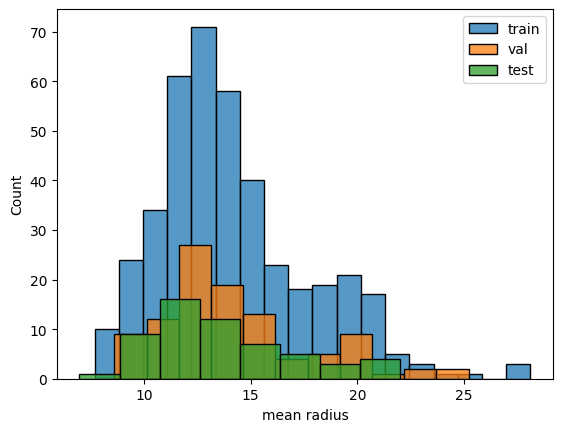

In [51]:
# X_train, X_val, X_test の元データの1列目の分布を確認
# X_train, X_val, X_test は Pandas DataFrame 形式なので、X_train.iloc[:,0] で取り出す

import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(X_train.iloc[:,0], label='train')
sns.histplot(X_val.iloc[:,0], label='val')
sns.histplot(X_test.iloc[:,0], label='test')
plt.legend()
plt.show()

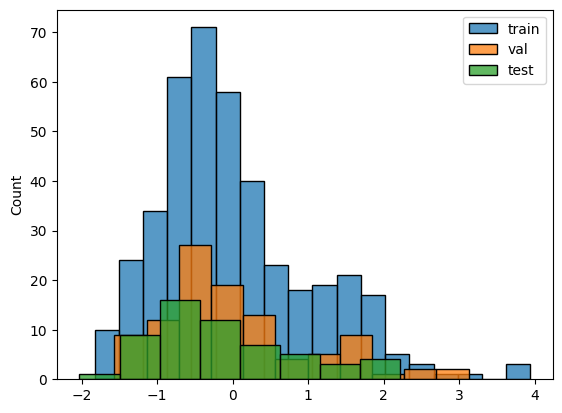

In [52]:
# 標準化された X_train_standardized, X_val_standardized, X_test_standardized の1列目の分布を確認
# X_train_standardized, X_val_standardized, X_test_standardized は numpy 形式なので、
# X_train_standardized[:,0] で取り出す
# ヒストグラムは同じでも、X軸の値が変わっていることに注意
sns.histplot(X_train_standardized[:,0], label='train')
sns.histplot(X_val_standardized[:,0], label='val')
sns.histplot(X_test_standardized[:,0], label='test')
plt.legend()
plt.show()

In [53]:
#標準化データの平均値と標準偏差を確認

print(f'X_train mean: {X_train.iloc[:,0].mean(): .2f}')
print(f'X_train std: {X_train.iloc[:,0].std(): .2f}')

print(f'X_train_standardized mean: {X_train_standardized[:,0].mean(): .2f}')
print(f'X_train_standardized std: {X_train_standardized[:,0].std(): .2f}')
print('')
print(f'X_val mean: {X_val.iloc[:,0].mean(): .2f}')
print(f'X_val std: {X_val.iloc[:,0].std(): .2f}')

print(f'X_val_standardized mean: {X_val_standardized[:,0].mean(): .2f}')
print(f'X_val_standardized std: {X_val_standardized[:,0].std(): .2f}')

print('')
print(f'X_test mean: {X_test.iloc[:,0].mean(): .2f}')
print(f'X_test std: {X_test.iloc[:,0].std(): .2f}')

print(f'X_test_standardized mean: {X_test_standardized[:,0].mean(): .2f}')
print(f'X_test_standardized std: {X_test_standardized[:,0].std(): .2f}')



X_train mean:  14.16
X_train std:  3.54
X_train_standardized mean: -0.00
X_train_standardized std:  1.00

X_val mean:  14.22
X_val std:  3.56
X_val_standardized mean:  0.02
X_val_standardized std:  1.00

X_test mean:  13.72
X_test std:  3.35
X_test_standardized mean: -0.12
X_test_standardized std:  0.94


In [54]:
# 正規化
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler() 関数を使用して、norm_scaler という正規化を行うオブジェクトを作成
norm_scaler = MinMaxScaler()

# 訓練データに対して正規化を適用
X_train_normalized = norm_scaler.fit_transform(X_train)

# 検証データに対して正規化を適用（訓練データのスケーリングパラメータを使用）
X_val_normalized = norm_scaler.transform(X_val)

# テストデータに対して正規化を適用（訓練データのスケーリングパラメータを使用）
X_test_normalized = norm_scaler.transform(X_test)


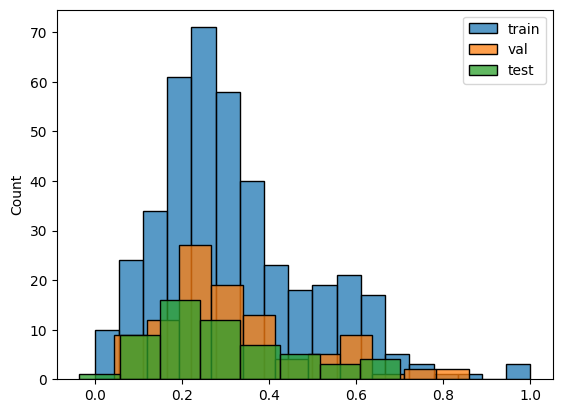

In [55]:
#正規化された X_train_noramlized, X_val_normalized, X_test_normalized の1列目を確認
sns.histplot(X_train_normalized[:,0], label='train')
sns.histplot(X_val_normalized[:,0], label='val')
sns.histplot(X_test_normalized[:,0], label='test')
plt.legend()
plt.show()

In [56]:
#正規化データの平均値と標準偏差を確認

print(f'X_train mean: {X_train.iloc[:,0].mean(): .2f}')
print(f'X_train std: {X_train.iloc[:,0].std(): .2f}')

print(f'X_train_normalized mean: {X_train_normalized[:,0].mean(): .2f}')
print(f'X_train_normalized std: {X_train_normalized[:,0].std(): .2f}')
print('')
print(f'X_val mean: {X_val.iloc[:,0].mean(): .2f}')
print(f'X_val std: {X_val.iloc[:,0].std(): .2f}')

print(f'X_val_normalized mean: {X_val_normalized[:,0].mean(): .2f}')
print(f'X_val_normalized std: {X_val_normalized[:,0].std(): .2f}')

print('')
print(f'X_test mean: {X_test.iloc[:,0].mean(): .2f}')
print(f'X_test std: {X_test.iloc[:,0].std(): .2f}')

print(f'X_test_normalized mean: {X_test_normalized[:,0].mean(): .2f}')
print(f'X_test_normalized std: {X_test_normalized[:,0].std(): .2f}')



X_train mean:  14.16
X_train std:  3.54
X_train_normalized mean:  0.32
X_train_normalized std:  0.17

X_val mean:  14.22
X_val std:  3.56
X_val_normalized mean:  0.32
X_val_normalized std:  0.17

X_test mean:  13.72
X_test std:  3.35
X_test_normalized mean:  0.30
X_test_normalized std:  0.16


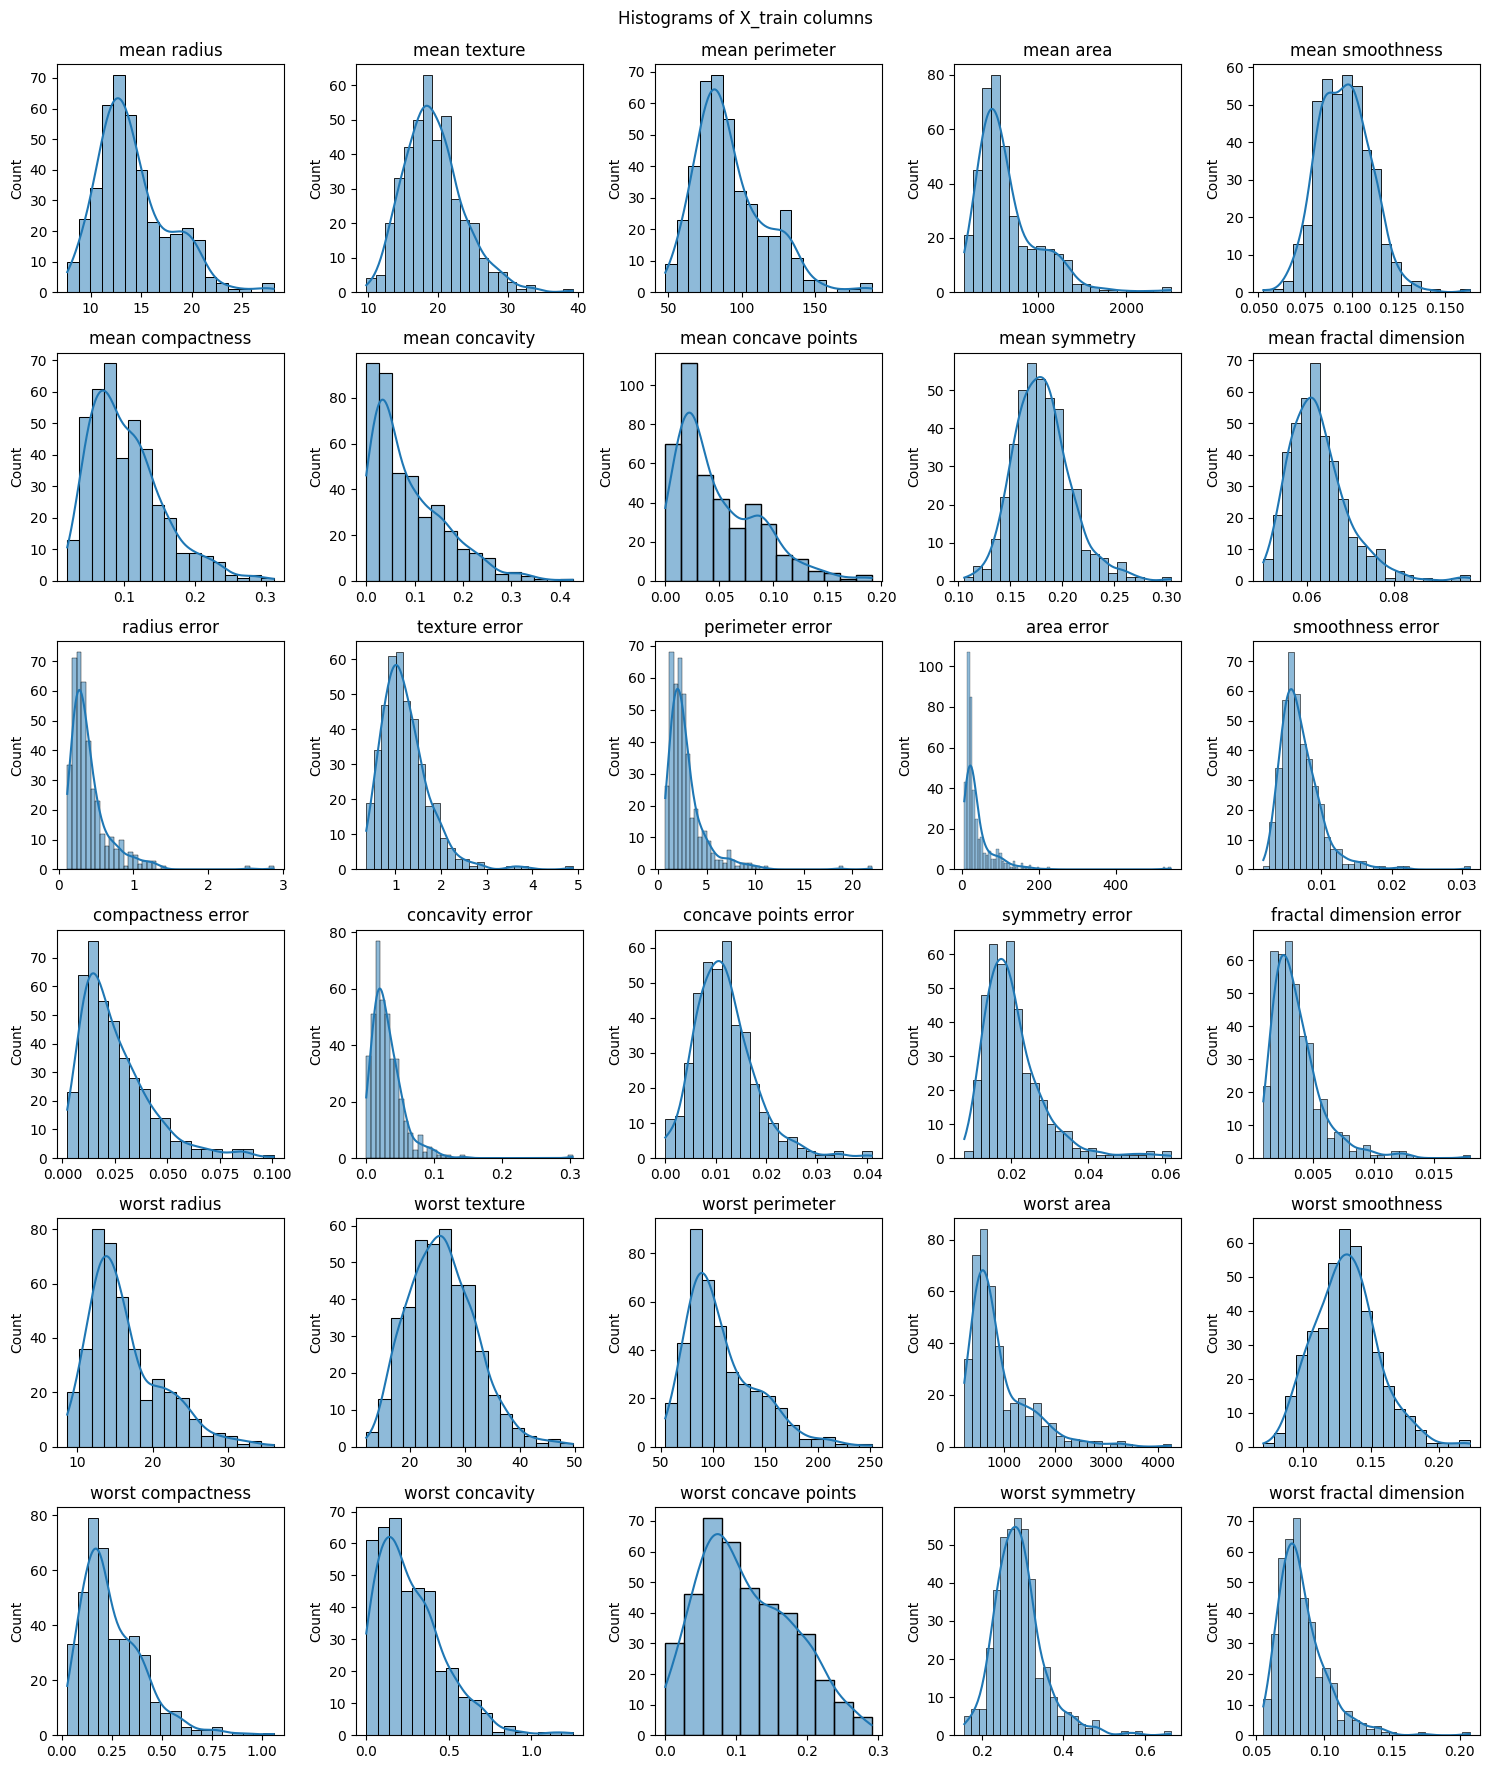

In [57]:
# このデータセットの各特徴量の分布を確認する

# プロットの設定
fig, axes = plt.subplots(6, 5, figsize=(15, 18))
fig.suptitle('Histograms of X_train columns')

# 30の特徴量のヒストグラムを描画
for i in range(30):
    row = i // 5  #行のインデックス (0,1,2,3,4,5) は5で割った時の商
    col = i % 5   #列は5で割った時のあまり
    ax = axes[row, col]
    
    sns.histplot(X_train.iloc[:, i], ax=ax, kde=True)
    ax.set_title(df.columns[i])
    ax.set_xlabel('')

# レイアウトの調整
plt.tight_layout()
plt.subplots_adjust(top=0.95)

- 上記、ロジスティック回帰では、標準化を使用したほうがよいという原則があるが、データが正規分布ではないので、以下の解析では正規化データ (データ範囲が0-1) を使用する

#### 5.4. モデルの選択

- 教師あり学習でよく使われるモデルとその特徴

| モデル名 | 特徴 | 主な用途 |
| --- | --- | --- |
| ロジスティック回帰 (Logistic Regression) | 線形モデル。二項分類問題に適している。解釈しやすい。 | 二項分類（例：スパム検出、病気の有無の判定） |
| 線形回帰 (Linear Regression) | 連続値の予測に使用。特徴量とターゲットの関係を線形で表現。 | 連続値の予測（例：住宅価格予測、売上予測） |
| 決定木 (Decision Tree) | 直感的で解釈しやすい。過学習しやすいが、剪定によって改善可能。 | 分類・回帰（例：顧客分類、売上予測） |
| ランダムフォレスト (Random Forest) | 多数の決定木を組み合わせて性能を向上。過学習を抑制。 | 分類・回帰（例：顧客分類、売上予測） |
| サポートベクターマシン (Support Vector Machine, SVM) | 高次元空間でも有効。カーネルを使用して非線形問題も解決可能。 | 分類（例：画像分類、テキスト分類） |
| k近傍法 (k-Nearest Neighbors, k-NN) | シンプルで直感的。計算コストが高いが、効果的。 | 分類・回帰（例：パターン認識、推奨システム） |
| ナイーブベイズ (Naive Bayes) | 確率モデル。特にテキスト分類に有効。計算が高速。 | 分類（例：スパムフィルタリング、感情分析） |
| ニューラルネットワーク (Neural Network) | 複雑な関係を学習可能。深層学習を含む。大量のデータに適している。 | 分類・回帰（例：画像認識、自然言語処理） |
| 勾配ブースティング (Gradient Boosting) | 多数の弱い学習器を組み合わせて性能を向上。過学習しにくい。 | 分類・回帰（例：競技プログラミング、金融予測） |



- 参考: 各モデルをscikit-learnからインポートする時のコマンドの一覧

| モデル名 | インポートコマンド |
| --- | --- |
| ロジスティック回帰 (Logistic Regression) | `from sklearn.linear_model import LogisticRegression` |
| 線形回帰 (Linear Regression) | `from sklearn.linear_model import LinearRegression` |
| 決定木 (Decision Tree) | `from sklearn.tree import DecisionTreeClassifier` （分類の場合）<br>`from sklearn.tree import DecisionTreeRegressor` （回帰の場合） |
| ランダムフォレスト (Random Forest) | `from sklearn.ensemble import RandomForestClassifier` （分類の場合）<br>`from sklearn.ensemble import RandomForestRegressor` （回帰の場合） |
| サポートベクターマシン (Support Vector Machine, SVM) | `from sklearn.svm import SVC` （分類の場合）<br>`from sklearn.svm import SVR` （回帰の場合） |
| k近傍法 (k-Nearest Neighbors, k-NN) | `from sklearn.neighbors import KNeighborsClassifier` （分類の場合）<br>`from sklearn.neighbors import KNeighborsRegressor` （回帰の場合） |
| ナイーブベイズ (Naive Bayes) | `from sklearn.naive_bayes import GaussianNB` |
| ニューラルネットワーク (Neural Network) | `from sklearn.neural_network import MLPClassifier` （分類の場合）<br>`from sklearn.neural_network import MLPRegressor` （回帰の場合） |
| 勾配ブースティング (Gradient Boosting) | `from sklearn.ensemble import GradientBoostingClassifier` （分類の場合）<br>`from sklearn.ensemble import GradientBoostingRegressor` （回帰の場合） |



#### 5.5. モデルの訓練
- LogisticRegression() 関数から、 model という推定器となるオブジェクトを生成する
- modelのメソッド fit() 関数を用いて、訓練データと正解ラベルを指定することで、学習が行われる

In [58]:
# ロジスティック回帰モデルを用いて分類する

# LogisticRegression をインポートする
from sklearn.linear_model import LogisticRegression

# ロジスティック回帰モデルの推定器 model を作成
model = LogisticRegression()

# モデルの訓練
model.fit(X_train_normalized, y_train)


LogisticRegression()

#### 5.6 モデルの検証
- model のメソッド predict() に 検証データを入れ、どのような結果を出すかを見る
- この時、以下を計算する
    - 混同行列 Confusion matrix

|     | 予測: Positive | 予測: Negative |
| --- | --- | --- |
| 実際: Positive | True Positive (TP) | False Negative (FN) |
| 実際: Negative | False Positive (FP) | True Negative (TN) |

- **True Positive (TP)**: 悪性を悪性と予測した数
- **True Negative (TN)**: 良性を良性と予測した数
- **False Positive (FP)**: 良性を悪性と予測した数（偽陽性）
- **False Negative (FN)**: 悪性を良性と予測した数（偽陰性）
- 正解率 Accuracy        
    - Accuracy = 正しく予測されたサンプルの数 / 全サンプル数



In [59]:
# 検証データをモデルに代入し、予測ラベルを計算する
y_val_pred = model.predict(X_val_normalized)


<Axes: >

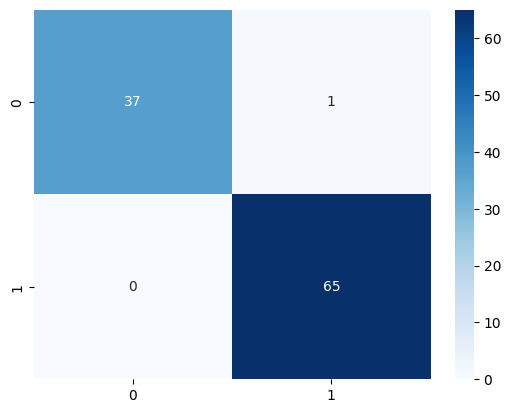

In [60]:
# 検証データに対する評価結果を表示
# confusion matrix を計算する
# scikit-learn の metrics モジュールから confusion_matrix() 関数をインポートする
from sklearn.metrics import confusion_matrix

# 検証データの正解ラベル y_val と 予測ラベル y_val_pred から混同行列を作成する
val_conf_matrix = confusion_matrix(y_val, y_val_pred)

# 混同行列を可視化する
sns.heatmap(val_conf_matrix, annot=True, cmap='Blues')

In [61]:
# 検証データに対する評価結果を表示
# 正確度 accuracy を見る
# scikit-learn の metrics モジュールから accuracy_score() 関数をインポートする

from sklearn.metrics import accuracy_score

val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy: .2f}')


Validation Accuracy:  0.99


In [62]:
# 分類のレポートを見る
# scikit-learn の metrics モジュールから classification_report() 関数をインポートする
from sklearn.metrics import classification_report

val_class_report = classification_report(y_val, y_val_pred)

print('Validation Classification Report')
print(val_class_report)

Validation Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      1.00      0.99        65

    accuracy                           0.99       103
   macro avg       0.99      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103



#### 5.7. クロスバリデーション

- クロスバリデーション（交差検証）: モデルの性能を評価し、過学習を防ぐための方法
- データセットを複数の部分（フォールド）に分割し、それぞれを順番に検証データとして使用

#### 一般的なクロスバリデーションの手法

- K-分割交差検証（K-Fold Cross-Validation）:
   - データセットをK個の等しいサイズのフォールドに分割する
   - K-1個のフォールドを訓練データとして使用し、残りの1個を検証データとして使用する
   - この過程をK回繰り返し、平均性能を計算する

- 層化K分割交差検証（Stratified K-Fold Cross-Validation）:
   - K-分割交差検証の変形で、各フォールドでクラスの比率を保持する
   - 不均衡なデータセットに特に有効である

3. リーブ・ワン・アウト交差検証（Leave-One-Out Cross-Validation）:
   - データポイントの数だけ分割を行う極端な形のK分割交差検証法
   - 計算コストが高いため、小さなデータセットに適している

scikit-learnでのクロスバリデーションの実装例：


クロスバリデーションを使用することで、モデルの性能をより信頼性高く評価でき、過学習のリスクを軽減することができる。

In [63]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# 訓練・検証データに対して正規化を適用
# 今、クロスバリデーションを行うので、テストデータを除いた X_train_val に対して正規化
norm_scaler = MinMaxScaler()
X_train_val_normalized = norm_scaler.fit_transform(X_train_val)

# モデルの初期化
model_cv = LogisticRegression()

# 5分割交差検証の実行
scores = cross_val_score(model_cv, X_train_val_normalized, y_train_val, cv=5)

print("Cross-validation scores:", scores)
print("Mean accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-validation scores: [0.99029126 0.95145631 0.96078431 0.98039216 0.95098039]
Mean accuracy: 0.97 (+/- 0.03)


#### 5.8. テストデータを使ったデータの予測
- 本来は、データの一部を分割し、検証データとし、その後、全く違うデータセットをテストデータとして使用し、モデルの汎化性能を見る
- model のメソッド predict() に テストデータを入れ、予測ラベルを計算する

In [64]:
# テストデータをモデルに代入し、予測ラベルを計算する
y_test_pred = model.predict(X_test_normalized)


#### 5.9. テストデータを使ったモデルの評価
- 検証データと同様、混同行列を作成し、正解率を計算する

<Axes: >

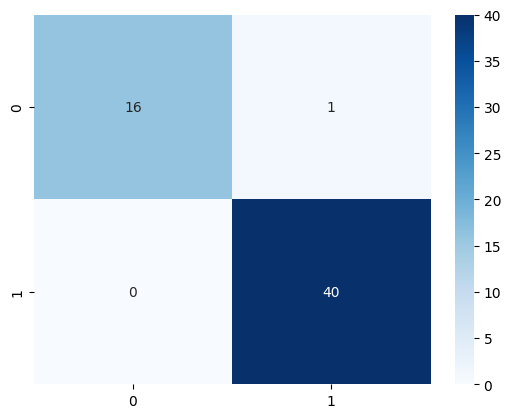

In [65]:
# テストデータの正解ラベル y_test と 予測ラベル y_test_pred から混同行列を作成する
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# 混同行列を可視化する
sns.heatmap(test_conf_matrix, annot=True, cmap='Blues')

In [66]:
# テストデータに対する評価結果を表示
# 正確度 accuracy を見る

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy: .2f}')


Test Accuracy:  0.98


In [67]:
# 分類のレポートを見る

test_class_report = classification_report(y_test, y_test_pred)

print('Test Classification Report')
print(test_class_report)

Test Classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.98      1.00      0.99        40

    accuracy                           0.98        57
   macro avg       0.99      0.97      0.98        57
weighted avg       0.98      0.98      0.98        57



### 6. 異なるモデルの選択
- scikit-learn では、モデルを選択する1行を変更するだけで、異なる方法での機械学習を行うことができる

In [68]:
# 上記で行ったことをまとめて、関数とする
# 練習問題でモデルの違いを簡単に検討できるようにするため

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# グローバル変数として定義
X_train, X_val, X_test = None, None, None
y_train, y_val, y_test = None, None, None
X_train_preproc, X_val_preproc, X_test_preproc = None, None, None
y_train_preproc, y_val_preproc, y_test_preproc = None, None, None

# 前処理の関数: 読み込みと分割
def breast_cancer_preproc_load():
    global X_train, X_val, X_test, y_train, y_val, y_test

    # データセットの読み込み
    dataset = load_breast_cancer()

    # データをPandas の DataFrameに変換
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target

    # データフレーム df を 特徴量 X とターゲット(正解ラベル) y に分ける
    X = df.drop(columns=['target'])
    y = df['target']

    # データを訓練用, 検証用, テスト用に分割する
    # 訓練・検証データを90%, テストデータを10%として分割化し、
    # 訓練・検証データを訓練用 (train) に80%, 検証用 (val) に 20% に分割する
    # つまり訓練用 72%, 検証用 18%

    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)    


# 前処理の関数: 標準化
def breast_cancer_preproc_standardized():
    global X_train_preproc, X_val_preproc, X_test_preproc
    global y_train_preproc, y_val_preproc, y_test_preproc

    # StandardScaler() 関数を使用して、standard_scalerという標準化を行うオブジェクトを作成
    std_scaler = StandardScaler()

    # 訓練データに対して標準化を適用
    # fit_transform は、標準化するパラメータを計算(fit)して、それをあてはめる(transform)
    X_train_preproc = std_scaler.fit_transform(X_train)

    # 検証用、テストデータに対しても標準化を適用
    # 訓練データで求めた標準化パラメータを用いて訓練データに適用
    X_val_preproc = std_scaler.transform(X_val)
    X_test_preproc = std_scaler.transform(X_test)


# 前処理の関数: 正規化
def breast_cancer_preproc_normalized():
    global X_train_preproc, X_val_preproc, X_test_preproc
    global y_train_preproc, y_val_preproc, y_test_preproc
    
    # MinMaxScaler() 関数を使用して、norm_scaler という正規化を行うオブジェクトを作成
    norm_scaler = MinMaxScaler()

    # 訓練データに対して正規化を適用
    X_train_preproc = norm_scaler.fit_transform(X_train)

    # 検証データ、テストデータに対して正規化を適用（訓練データのスケーリングパラメータを使用）
    X_val_preproc = norm_scaler.transform(X_val)
    X_test_preproc = norm_scaler.transform(X_test)


# 学習・検証・評価の関数
def breast_cancer_evaluation():
    #選択したモデルを用いて訓練データを用いて学習する
    model.fit(X_train_preproc, y_train)

    # 検証データをモデルに代入し、予測ラベルを計算する
    y_val_pred = model.predict(X_val_preproc)
    
    # 検証データに対する評価結果を表示
    # confusion matrix を計算する
    # 検証データの正解ラベル y_val と 予測ラベル y_val_pred から混同行列を作成する
    val_conf_matrix = confusion_matrix(y_val, y_val_pred)
    print('Validation confusion matrix')
    print(val_conf_matrix)

    # 正確度 accuracy を見る
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f'Validation Accuracy: {val_accuracy: .2f}')

    # 分類のレポートを見る
    val_class_report = classification_report(y_val, y_val_pred)
    print('Validation Classification Report')
    print(val_class_report)

    # テストデータをモデルに代入し、予測ラベルを計算する
    y_test_pred = model.predict(X_test_preproc)
    
    # テストデータの正解ラベル y_test と 予測ラベル y_test_pred から混同行列を作成する
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    print('Test confusion matrix')
    print(test_conf_matrix)

    # テストデータに対する評価結果を表示
    # 正確度 accuracy を見る
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'Test Accuracy: {test_accuracy: .2f}')

    # 分類のレポートを見る
    test_class_report = classification_report(y_test, y_test_pred)
    print('Test Classification Report')
    print(test_class_report)

#### 6.1 練習問題
- 下のセルで異なるモデルを選んでみましょう
- 前処理と評価はすでに上のセルで関数で定義してあるので心配いりません
- 自分が使いたいと思うモデルのコメントを2行外してください
- 他のモデルはすべてコメントアウト(行頭に # がついている)されていることを確認してください

In [69]:
#前処理(1)読み込み: ここはいじらなくて大丈夫です
breast_cancer_preproc_load()

#前処理(2)標準化・正規化
# どちらか選択してください
#breast_cancer_preproc_standardized()
breast_cancer_preproc_normalized()


In [70]:


######## モデル一覧 ########
### このセクションに自分が使いたいモデルのコメントを外してください
### 初期状態では、決定木のモデルを使うようになっています

#from sklearn.linear_model import LogisticRegression #ロジスティック回帰
#model = LogisticRegression()

from sklearn.tree import DecisionTreeClassifier #決定木
model = DecisionTreeClassifier()

#from sklearn.ensemble import RandomForestClassifier #ランダムフォレスト
#model = RandomForestClassifier()

#from sklearn.svm import SVC #サポートベクターマシン
#model = SVC()

#from sklearn.neighbors import KNeighborsClassifier #k近傍法
#model = KNeighborsClassifier()

#from sklearn.naive_bayes import GaussianNB #ナイーブベイズ
#model = GaussianNB()

#from sklearn.neural_network import MLPClassifier #ニューラルネットワーク
#model = MLPClassifier()

#from sklearn.ensemble import GradientBoostingClassifier #勾配ブースティング
#model = GradientBoostingClassifier()

######## モデル一覧 ここまで ########


####ここから下はいじらなくて大丈夫です。
#評価
breast_cancer_evaluation()

Validation confusion matrix
[[35  3]
 [ 6 59]]
Validation Accuracy:  0.91
Validation Classification Report
              precision    recall  f1-score   support

           0       0.85      0.92      0.89        38
           1       0.95      0.91      0.93        65

    accuracy                           0.91       103
   macro avg       0.90      0.91      0.91       103
weighted avg       0.92      0.91      0.91       103

Test confusion matrix
[[16  1]
 [ 4 36]]
Test Accuracy:  0.91
Test Classification Report
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.97      0.90      0.94        40

    accuracy                           0.91        57
   macro avg       0.89      0.92      0.90        57
weighted avg       0.92      0.91      0.91        57



#### 6.2 特徴量の重要度分析

- 特徴量の重要度分析は、モデルの予測に各特徴量がどの程度寄与しているかを理解するための方法
- 以下が期待できる
    1. モデルの解釈可能性の向上
    2. 重要な予測因子の特定
    3. 特徴量選択のための洞察の獲得
    4. モデルの簡略化の可能性

- 医療データ分析において、特徴量の重要度は臨床的な洞察を得るために非常に有用
    - 特定の疾患の診断や予後予測に最も影響を与える因子を特定

- 決定木とランダムフォレストについては、やみくもに値を入れるのではなく、特徴量の重要度分析を行った結果を入れることで結果が改善する可能性がある

##### 6.2.1 決定木での特徴量重要度

- 決定木モデルでは、各特徴量の重要度は、その特徴量に基づいて行われた分割がどれだけ不純度（例：ジニ不純度やエントロピー）を減少させたかによって測定される


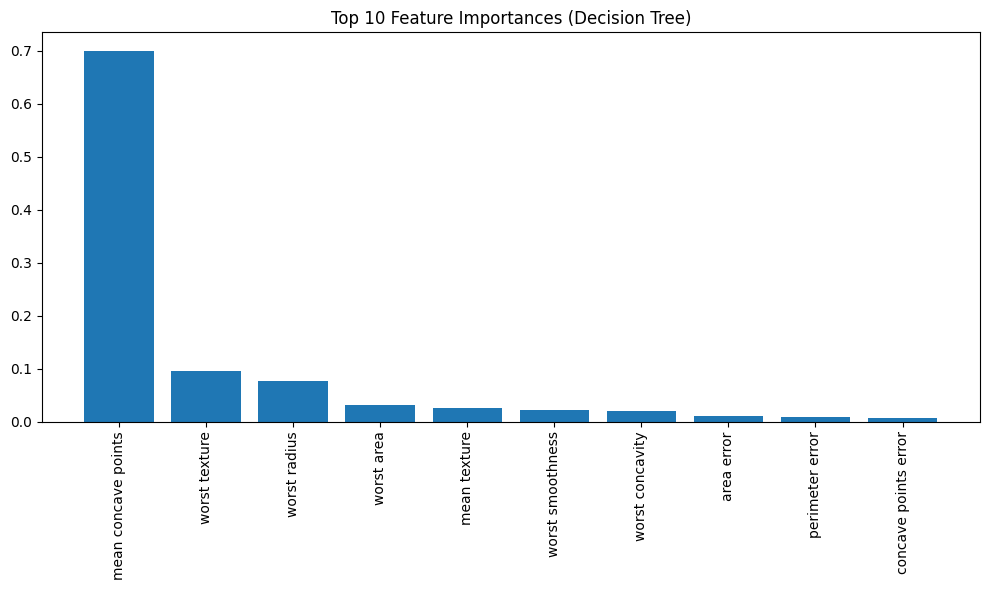

1. mean concave points (0.699780)
2. worst texture (0.096508)
3. worst radius (0.076745)
4. worst area (0.031013)
5. mean texture (0.026060)
6. worst smoothness (0.022437)
7. worst concavity (0.019800)
8. area error (0.009946)
9. perimeter error (0.009476)
10. concave points error (0.006892)


In [71]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# 決定木モデルの学習
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_normalized, y_train)

# 特徴量の重要度を取得
importances = tree_model.feature_importances_
feature_names = X_train.columns

# 重要度順にソート
indices = np.argsort(importances)[::-1]

# 上位10個の特徴量の重要度をプロット
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.bar(range(10), importances[indices][:10])
plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=90)
plt.tight_layout()
plt.show()

# 重要度上位10個の特徴量を表示
for f in range(10):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))


##### 6.2.2 ランダムフォレストでの特徴量重要度

- ランダムフォレストは複数の決定木の集合であり、より安定した特徴量重要度の推定ができる


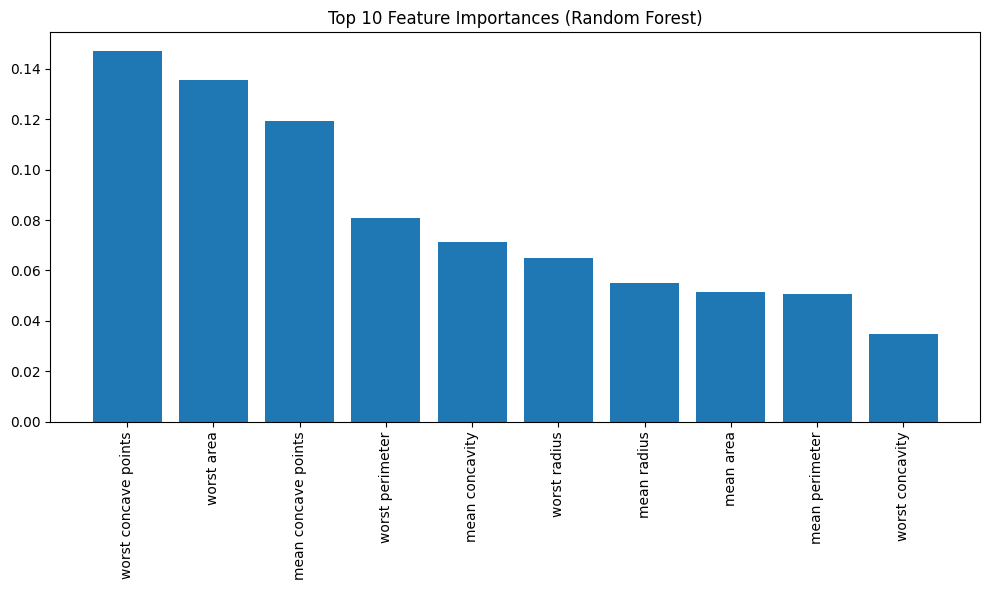

1. worst concave points (0.147144)
2. worst area (0.135682)
3. mean concave points (0.119435)
4. worst perimeter (0.080975)
5. mean concavity (0.071477)
6. worst radius (0.064951)
7. mean radius (0.055064)
8. mean area (0.051414)
9. mean perimeter (0.050629)
10. worst concavity (0.034881)


In [72]:
from sklearn.ensemble import RandomForestClassifier

# ランダムフォレストモデルの学習
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normalized, y_train)

# 特徴量の重要度を取得
importances = rf_model.feature_importances_
feature_names = X_train.columns

# 重要度順にソート
indices = np.argsort(importances)[::-1]

# 上位10個の特徴量の重要度をプロット
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.bar(range(10), importances[indices][:10])
plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=90)
plt.tight_layout()
plt.show()

# 重要度上位10個の特徴量を表示
for f in range(10):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

##### 6.2.3 結果の解釈

- 特徴量重要度の結果を解釈する際は、以下の点に注意する

    1. 相対的な重要度：各特徴量の重要度は相対的なものであり、合計が1になるよう正規化されている。
    2. 一貫性：決定木とランダムフォレストで一貫して重要とされる特徴量に注目する。
    3. 臨床的意義：統計的に重要な特徴量が、必ずしも臨床的に意味のある特徴量とは限らない。医学的知識と組み合わせて解釈することが重要である。
    4. モデルの限界：特徴量の重要度はモデルに依存する。異なるモデルで異なる結果が得られる可能性がある。
    5. 相関関係：強く相関する特徴量がある場合、それらの重要度が分散される可能性がある。


#### 6.3 ROC曲線とAUC

- ROC（Receiver Operating Characteristic）曲線とAUC（Area Under the Curve）は、二値分類モデルの性能を評価するための重要なツール

##### 6.3.1 ROC曲線

- ROC曲線は、異なる分類閾値におけるモデルの真陽性率（TPR、感度）と偽陽性率（FPR、1-特異度）をプロットしたもの

    - 真陽性率（TPR）= TP / (TP + FN)
    - 偽陽性率（FPR）= FP / (FP + TN)

        - TP: 真陽性（True Positive）
        - FN: 偽陰性（False Negative）
        - FP: 偽陽性（False Positive）
        - TN: 真陰性（True Negative）

- ROC曲線の特徴
    1. 左上隅に近いほど、モデルの性能が良い。
    2. 対角線に近いほど、モデルの予測が乱数に近い（性能が低い）。

##### 6.3.2 AUC
- ROC曲線の下の面積
- AUCは0から1の間の値をとり、高いほどモデルの性能が良い

- AUCの解釈
    - 0.5: ランダムな予測（対角線のROC曲線）
    - 0.7-0.8: 許容できる性能
    - 0.8-0.9: 良好な性能
    - 0.9以上: 非常に高い性能



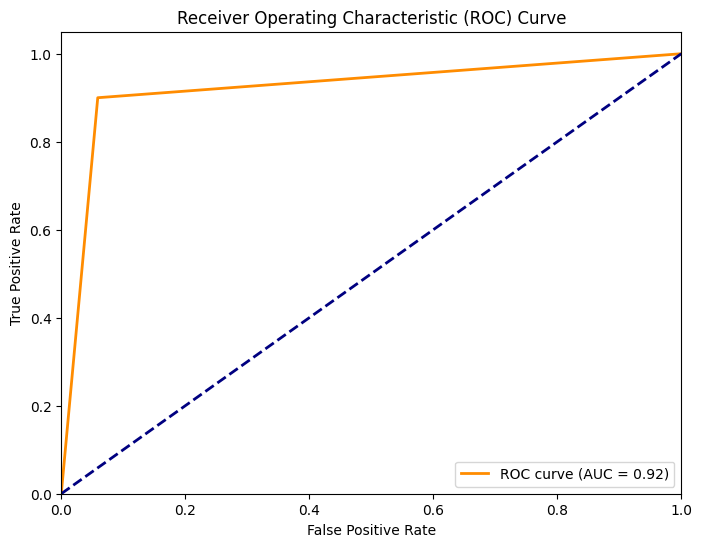

AUC: 0.92


In [73]:
# sklearn.metrics から roc_curve, auc をインポートする
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# モデルの予測確率を取得
y_pred_proba = model.predict_proba(X_test_normalized)[:, 1]

# ROC曲線の計算
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# AUCの計算
roc_auc = auc(fpr, tpr)

# ROC曲線のプロット
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f'AUC: {roc_auc:.2f}')

#### 6.4 ハイパーパラメータチューニング

- 機械学習モデルの性能を最適化する方法
- ハイパーパラメータ: モデルの学習過程自体には含まれず、学習前に設定する必要のあるパラメータ

##### 6.4.1 ハイパーパラメータチューニングの重要性

1. モデル性能の最適化：適切なハイパーパラメータの選択により、モデルの予測精度を向上させることができる

2. 過学習の防止：適切なハイパーパラメータは、モデルが訓練データに過度に適合することを防ぐ

3. 計算効率の向上：最適なハイパーパラメータにより、不必要に複雑なモデルを避けることができる

4. モデルの一般化：様々なデータセットに対して良好な性能を発揮するモデルの構築に役立つ

##### 6.4.2 主なハイパーパラメータチューニング手法

1. グリッドサーチ（Grid Search）：
   - 定義された全てのハイパーパラメータの組み合わせを試行
   - 網羅的だが、計算コストが高い

2. ランダムサーチ（Random Search）：
   - ハイパーパラメータの範囲から無作為に組み合わせを選択し試行
   - グリッドサーチより効率的で、予期せぬ良い組み合わせを発見できる可能性

3. ベイズ最適化：
   - 過去の試行結果を基に、次に試すべきハイパーパラメータを推定
   - 効率的だが、実装が複雑


##### 6.4.3 実装例：GridSearchCV と RandomizedSearchCV


In [74]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score

# ハイパーパラメータの範囲を定義
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# ベースモデルの定義
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring=make_scorer(roc_auc_score),
    n_jobs=-1
)

grid_search.fit(X_train_normalized, y_train)

print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)
print(f"Best AUC score: {grid_search.best_score_:.4f}")


Best parameters found by GridSearchCV:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best AUC score: 0.9600


In [75]:
# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    scoring=make_scorer(roc_auc_score),
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_normalized, y_train)

print("\nBest parameters found by RandomizedSearchCV:")
print(random_search.best_params_)
print(f"Best AUC score: {random_search.best_score_:.4f}")

# 最適なモデルを使用して予測
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_normalized)


Best parameters found by RandomizedSearchCV:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 15}
Best AUC score: 0.9600


##### 6.4.4 注意点

1. 計算コスト
   - ハイパーパラメータチューニングは計算コストが高くなる可能性
   - 大規模なデータセットや複雑なモデルでは注意が必要

2. 過学習のリスク
   - 検証データに対して過度にチューニングを行うと、テストデータでの性能が低下する可能性

3. 解釈可能性
   - チューニングによってモデルが複雑化し、解釈が難しくなる場合がある

4. 臨床的妥当性
   - 統計的に最適なモデルが、必ずしも臨床的に最適とは限らない
   - 医学的知識と組み合わせた評価が必要

- ハイパーパラメータチューニングは、機械学習モデルの性能を最大限に引き出すための重要な過程
- 医療分野では、高い精度と信頼性が要求されるため、適切なチューニングが不可欠
- 統計的な最適化と臨床的な有用性のバランスを取ることが重要
- 医学的知見と組み合わせて結果を解釈する必要